# Simulação <br>
Simular é aproximar, emular é igualar. <br>

**Vantagens**

- aproximação de um sistema real
- resultados de qualidade

**Desvantagens**

- precisa de um bom gerador de números aleatórios
- alto esforço de programação
- (warming up) início da simulação possui alta variabilidade
- (stop criteria) difícil determinar condições de parada
- (long runs)  longas execuções

## Geração de números pseudo-aleatórios

**Objetivo** → gerar números que dêem a aparência de serem aleatórios (pseudo)

- Sequência aparenta ser aleatória
    - verificação pode ou não ser complicada
    - **quando o ciclo começa a se repetir?**
- Garantir um longo ciclo antes de uma repetição



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## Métodos geradores de números pseudo-aleatórios

É um algoritmo que gera uma sequência de números, os quais são aproximadamente independentes um dos outros.

### Método Middle Square
[Referência](https://en.wikipedia.org/wiki/Middle-square_method) <br>


<img src="https://upload.wikimedia.org/wikipedia/commons/9/92/Middle-square_method.svg" width=250 height=200 />

In [2]:
def middle_square(seed, n_random_digits, random_n_precision):
    xs = []
    pseudo_rnd_numbers = []
    rnd_2n_precision, n_i  = random_n_precision * 2, 1
    while n_i < n_random_digits:
        seed_squared = str(int(seed)**2)
        if len(seed_squared) % rnd_2n_precision:
            seed_squared = (rnd_2n_precision - len(seed_squared)) * '0' + seed_squared 
        aux = seed
        seed = seed_squared[2:6]
        print('{}. {}^2 = {}[{}]{}'.format(n_i, aux, seed_squared[0:2], seed,seed_squared[6:8]))
        xs.append(n_i)
        pseudo_rnd_numbers.append(seed)
        n_i += 1
    return xs, pseudo_rnd_numbers

1. 5437^2 = 29[5609]69
2. 5609^2 = 31[4608]81
3. 4608^2 = 21[2336]64
4. 2336^2 = 05[4568]96
5. 4568^2 = 20[8666]24
6. 8666^2 = 75[0995]56
7. 0995^2 = 00[9900]25
8. 9900^2 = 98[0100]00
9. 0100^2 = 00[0100]00
10. 0100^2 = 00[0100]00
11. 0100^2 = 00[0100]00
12. 0100^2 = 00[0100]00
13. 0100^2 = 00[0100]00
14. 0100^2 = 00[0100]00
graph: 


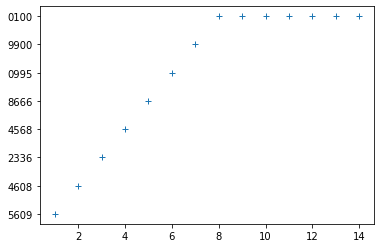

In [3]:
xs, ys = middle_square(seed=5437, n_random_digits=15, random_n_precision=4)
print('graph: ')
plt.plot(xs, ys, '+')
plt.show()

Observe que quando a semente passa a ser $100$, nos deparamos com um ciclo, <br>
*i.e., o número pseudo aleatório [$x_0,x_1,x_2,x_3$] invariavelmente é 00[0100]00* <br>
E é por isso que esse método não usado, basta poucas computações (nesse exemplo: $14$) <br>
que os números gerados começam a se repetir (deixa de ser estocástico facilmente).

## Método Congruente Linear
**Exercício:** <br>

Utilizando o conceito do método Congruente Linear para geração de números pseudo-aleatórios, programe um método que gere 1.000 (mil) números (entre os valores 0 e 1) a fim de produzir um gráfico de dispersão conforme apresentado no material de apoio de aula. 

* $x_0$: determina a sequência discreta
* $M$: determina o valor máximo gerado pela sequência
* $c$: é uma constante usada para **maior** variação dos números gerados

In [4]:
def congruente_linear(a, x_0, M, c, n):
    n_i = 0
    x_prev = x_0
    pseudo_rnd_numbers = []
    xs = []
    while n_i < n:
        x_i = (a * x_prev + c) % M
        pseudo_rnd_numbers.append(x_i/M)
        xs.append(n_i / n)
        x_prev = x_i
        n_i += 1
    return xs, pseudo_rnd_numbers

A escolha dos parâmetros muito influencia no resultado do gerador. <br>
Logo, eu segui a recomendação do artigo [***TABLES OF LINEAR CONGRUENTIAL GENERATORS
OF DIFFERENT SIZES AND GOOD LATTICE STRUCTURE***](https://www.ams.org/journals/mcom/1999-68-225/S0025-5718-99-00996-5/S0025-5718-99-00996-5.pdf). <br>

A configuração dos parâmetros fundamentais do meu gerador é dada por: <br>

* $M = 2^e$ 
* $a = 438293613$
* $c$ = ímpar 


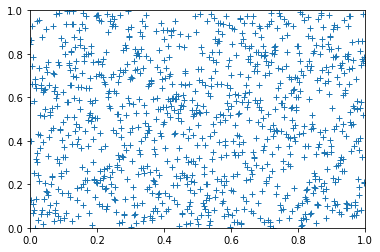

In [7]:
from math import e
xs, ys = congruente_linear(a=438293613, x_0=0.001, M=2**e, c=1013904223, n=1000)
plt.plot(xs, ys, '+')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()